Iris Dataset — Exploratory Data Analysis (EDA)

In [1]:
import numpy as n
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(8,5)



Load & Overview

In [2]:
df=sns.load_dataset("iris")
print("shape of the datset",df.shape)
print("\nDataset Info:")
df.info()
print("\nSummary statistics:")
print(df.describe(include='all'))


shape of the datset (150, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Summary statistics:
        sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238    

Cleaning (missing, duplicates, types)

In [6]:
print("\nMissing values per column:")
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
print(missing.sort_values(by='missing_percent',ascending=False))
print("\nDuplicates:",df.duplicated().sum())
df=df.drop_duplicates()
print("Duplicates after drop:",df.duplicated().sum())


# Data types
print("\nData types before conversion:")
print(df.dtypes)





Missing values per column:
              missing_count  missing_percent
sepal_length              0              0.0
sepal_width               0              0.0
petal_length              0              0.0
petal_width               0              0.0
species                   0              0.0

Duplicates: 0
Duplicates after drop: 0

Data types before conversion:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Univariate Analysis

a) Numerical features


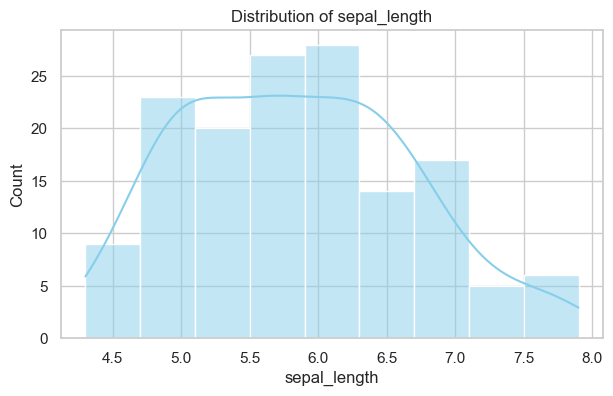

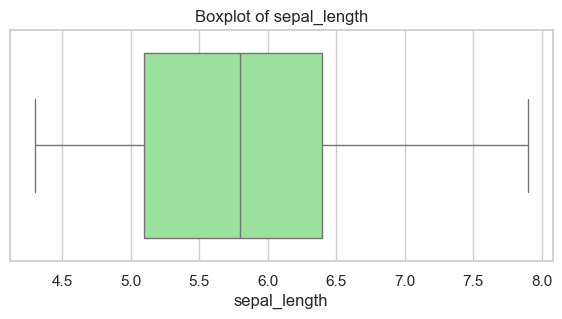

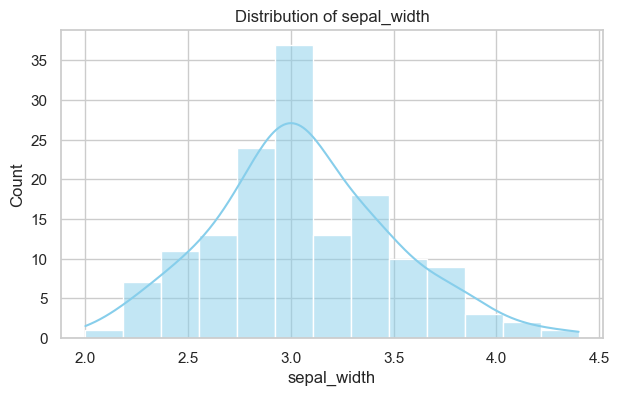

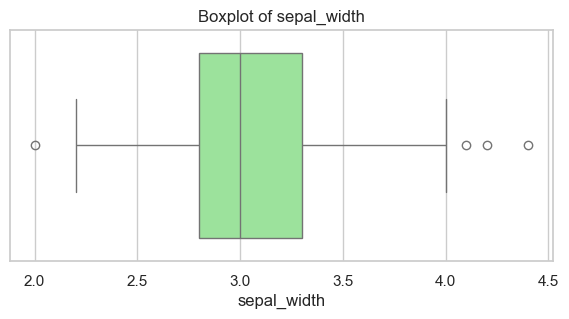

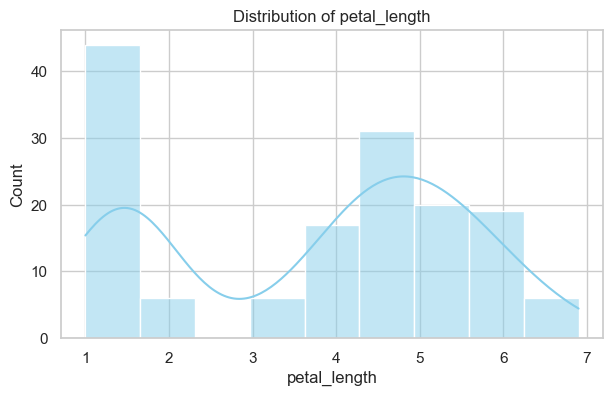

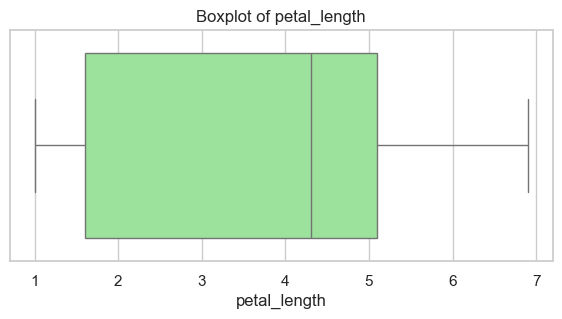

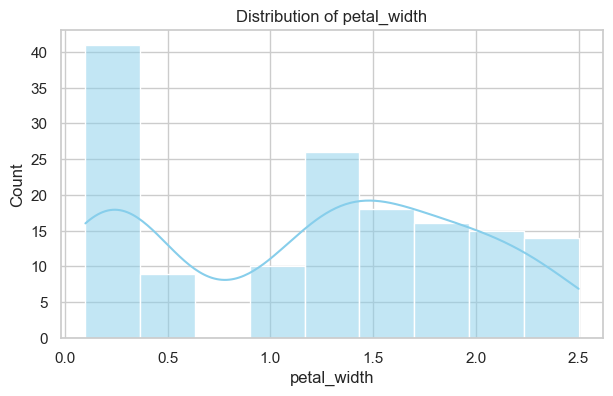

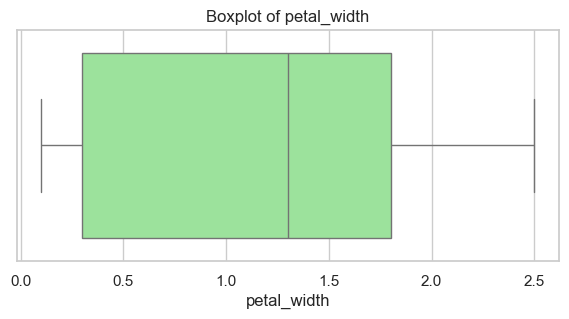

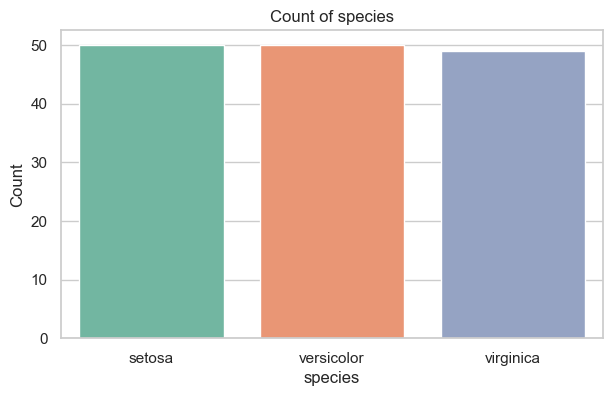

In [11]:
# Numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

    plt.figure(figsize=(7, 3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Categorical features
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Bivariate Analysis

Relationship between two numeric variables

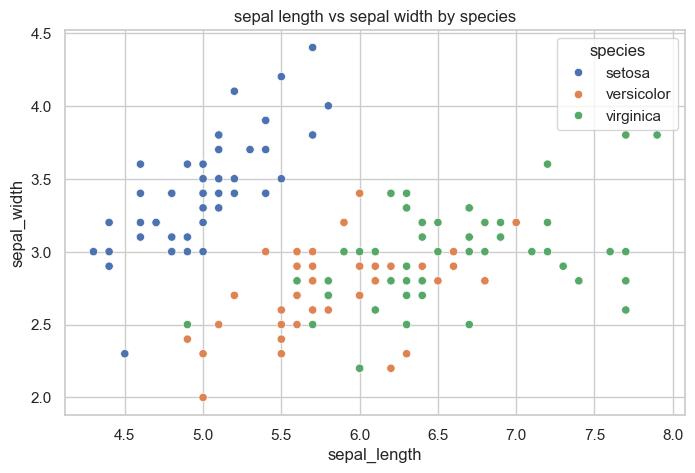

In [13]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.title('sepal length vs sepal width by species')
plt.show()


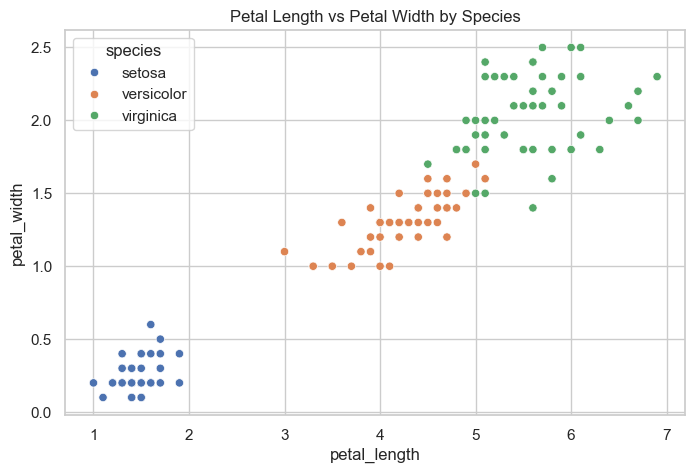

In [14]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Petal Length vs Petal Width by Species')
plt.show()

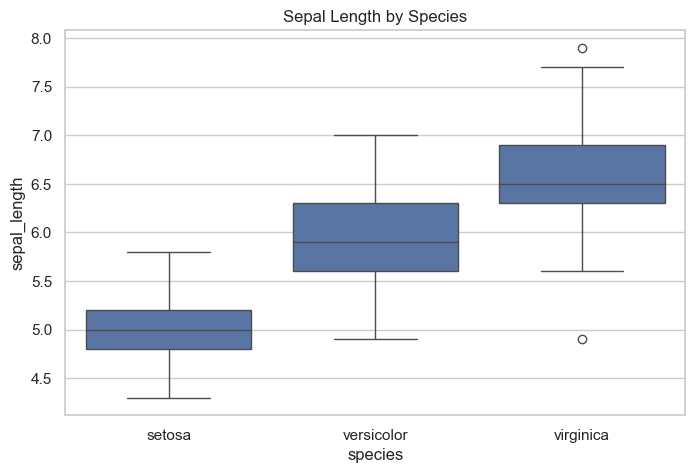

In [15]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')
plt.show()

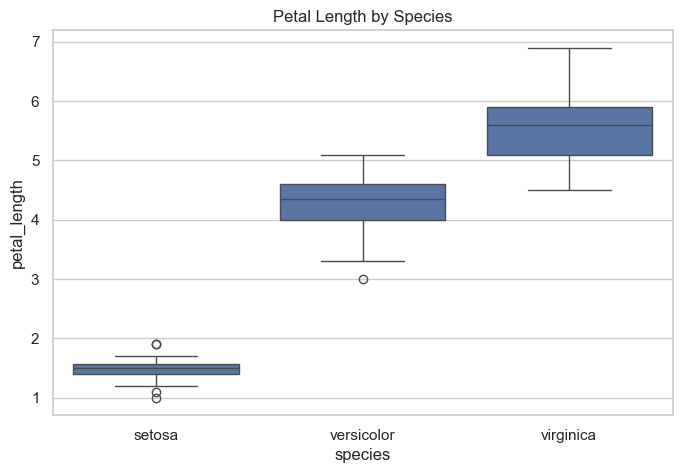

In [16]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')
plt.show()

Multivariate Analysis

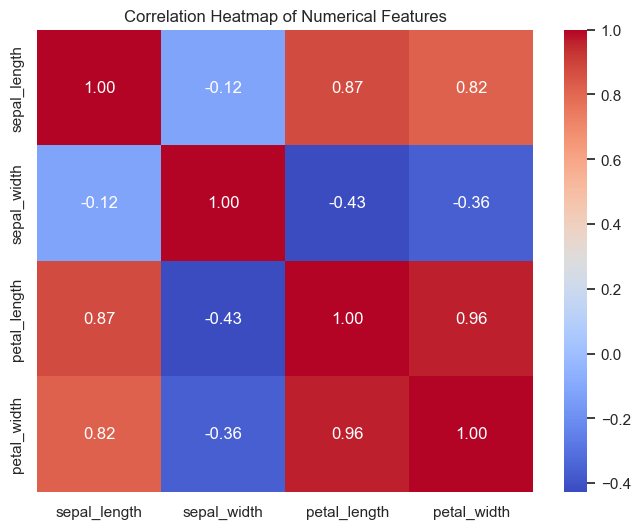

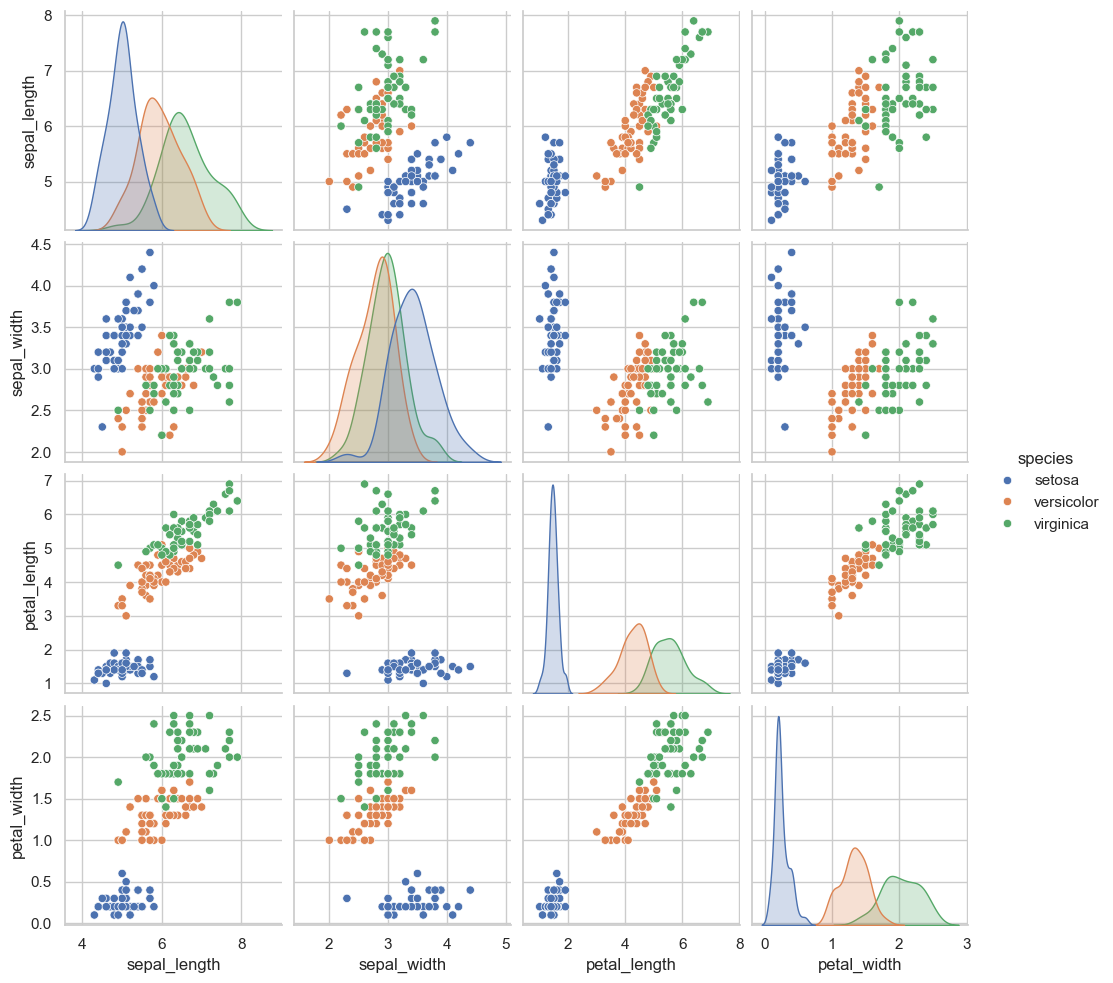

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

Outlier Detection (IQR method)

sepal_length — No. of outliers: 0


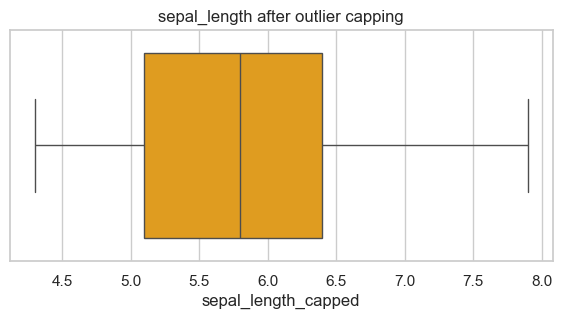

sepal_width — No. of outliers: 4


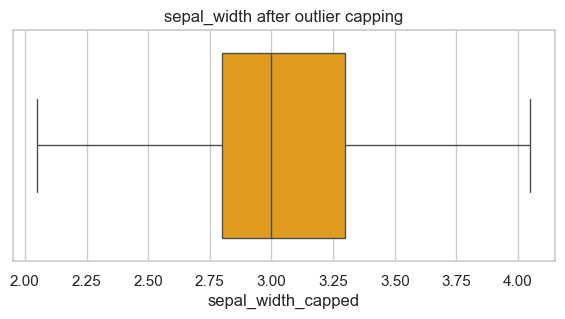

petal_length — No. of outliers: 0


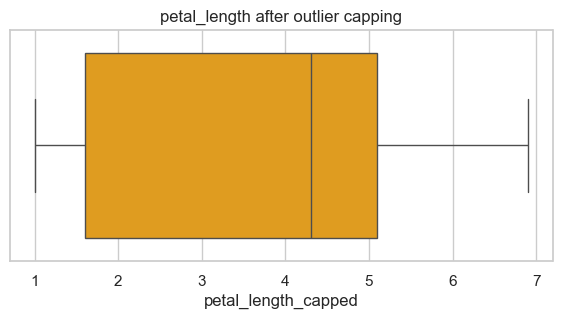

petal_width — No. of outliers: 0


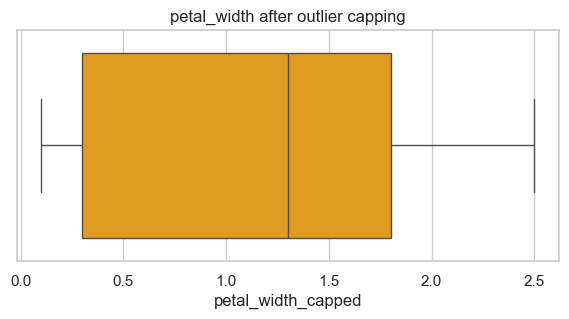

In [19]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'{col} — No. of outliers: {len(outliers)}')

    # Cap outliers
    df[col + '_capped'] = df[col].clip(lower, upper)
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col + '_capped'], color='orange')
    plt.title(f'{col} after outlier capping')
    plt.show()

Feature Engineering

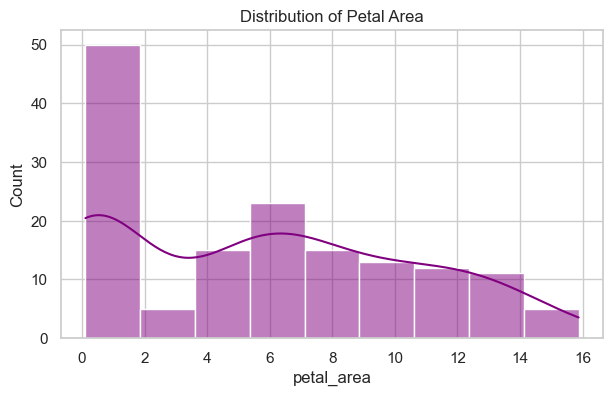

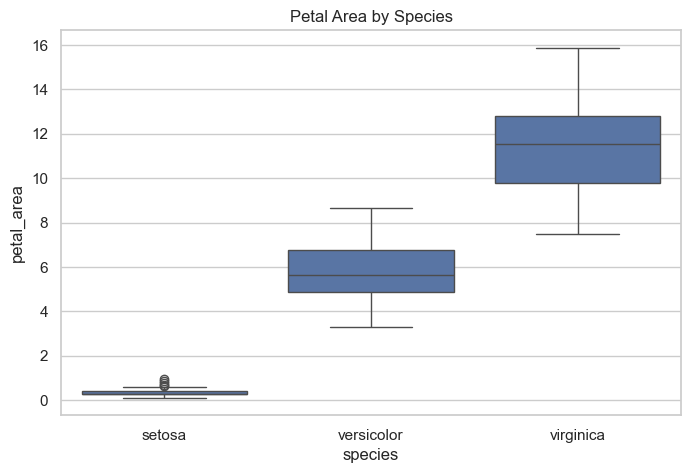

In [20]:
df['petal_area'] = df['petal_length'] * df['petal_width']
plt.figure(figsize=(7,4))
sns.histplot(df['petal_area'], kde=True, color='purple')
plt.title('Distribution of Petal Area')
plt.show()

sns.boxplot(x='species', y='petal_area', data=df)
plt.title('Petal Area by Species')
plt.show()

In [21]:
df.to_csv("iris_cleaned_featured.csv", index=False)
print("\n✔ Cleaned a nd featured iris dataset saved as iris_cleaned_featured.csv")


✔ Cleaned a nd featured iris dataset saved as iris_cleaned_featured.csv
